<a href="https://colab.research.google.com/github/DangTrungNhut/Artificial-Intelligence-course_Full/blob/main/Prediction_of_rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


60.205868761552715


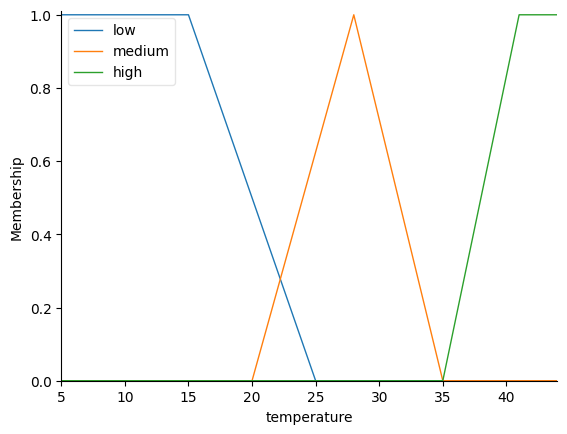

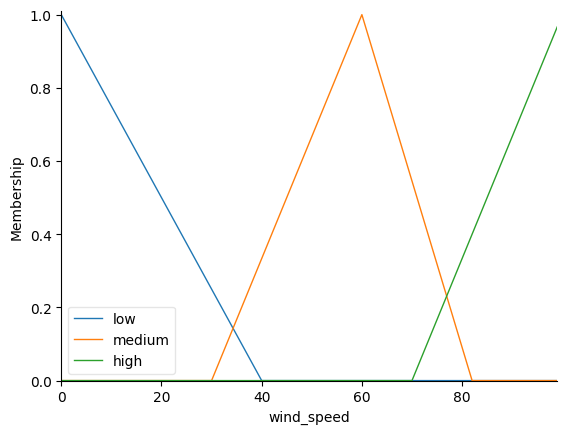

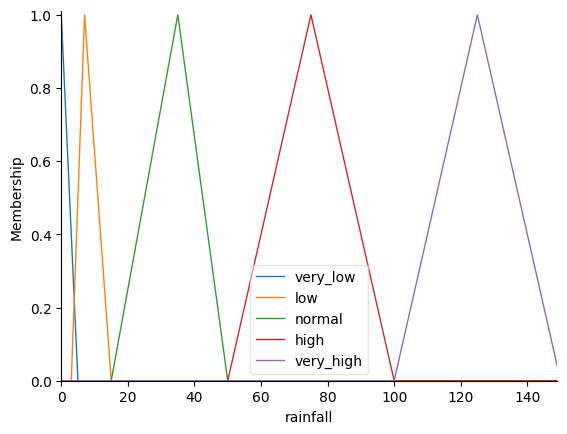

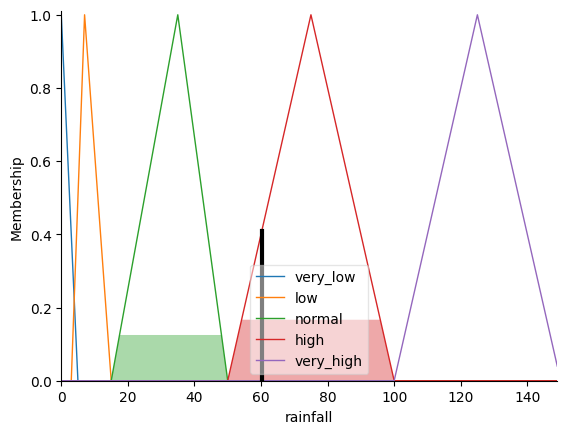

In [3]:

#import library
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

temperature = ctrl.Antecedent(np.arange(5, 45, 1), 'temperature')  #Hàm thành viên của biến vào nhiệt độ
wind_speed = ctrl.Antecedent(np.arange(0, 100, 1), 'wind_speed')   #Hàm thành viên của biến vào tốc độ gió
rainfall = ctrl.Consequent(np.arange(0, 150, 1), 'rainfall')       #Hàm thành viên của biến vào lượng mưa_output


temperature['low'] = fuzz.trapmf(temperature.universe, [0, 0, 15, 25])
temperature['medium'] = fuzz.trimf(temperature.universe, [20, 28, 35])
temperature['high'] = fuzz.trapmf(temperature.universe, [35, 41, 45, 45])

wind_speed['low'] = fuzz.trimf(wind_speed.universe, [0, 0, 40])
wind_speed['medium'] = fuzz.trimf(wind_speed.universe, [30, 60, 82])
wind_speed['high'] = fuzz.trimf(wind_speed.universe, [70, 100, 100])

rainfall['very_low'] = fuzz.trimf(rainfall.universe, [0, 0, 5])
rainfall['low'] = fuzz.trimf(rainfall.universe, [3, 7, 15])
rainfall['normal'] = fuzz.trimf(rainfall.universe, [15, 35, 50])
rainfall['high'] = fuzz.trimf(rainfall.universe, [50, 75, 100])
rainfall['very_high'] = fuzz.trimf(rainfall.universe, [100, 125, 150])


#Show
temperature.view()
wind_speed.view()
rainfall.view()

#Một số lập luận tiêu biểu được xây dựng
rule1 = ctrl.Rule(temperature['low'] & wind_speed['low'] , rainfall['very_low'])
rule2 = ctrl.Rule(temperature['low'] & wind_speed['medium'], rainfall['very_low'])
rule3 = ctrl.Rule(temperature['low'] & wind_speed['high'], rainfall['normal'])
rule4 = ctrl.Rule(temperature['medium'] & wind_speed['low'] , rainfall['low'])
rule5 = ctrl.Rule(temperature['medium'] & wind_speed['medium'], rainfall['normal'])
rule6 = ctrl.Rule(temperature['medium'] & wind_speed['high'], rainfall['normal'])
rule7 = ctrl.Rule(temperature['high'] & wind_speed['low'] , rainfall['normal'])
rule8 = ctrl.Rule(temperature['high'] & wind_speed['medium'], rainfall['high'])
rule9 = ctrl.Rule(temperature['high'] & wind_speed['high'], rainfall['very_high'])

rainfalling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7,rule8, rule9]) #thu thap data

rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl)   #teach

#input
rainfalling.input['temperature'] = 40
rainfalling.input['wind_speed'] = 35.0

#Output
rainfalling.compute()
print(rainfalling.output['rainfall'])
rainfall.view(sim = rainfalling)

